ASSIGNMENT-3


KRUTHIKA.J


20BCTO353

In [ ]:
#Load dataset
!unzip /content/drive/MyDrive/birds.zip


Archive:  /content/drive/MyDrive/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)


In [ ]:
train = train_gen.flow_from_directory('/content/test_data/test_data',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 157 images belonging to 16 classes.
Found 150 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
test.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=10)

Epoch 1/10
20/20 [==============================] - 82s 4s/step - loss: 2.4659 - accuracy: 0.1783 - val_loss: 2.7040 - val_accuracy: 0.0467
Epoch 2/10
20/20 [==============================] - 83s 4s/step - loss: 2.3335 - accuracy: 0.2484 - val_loss: 2.7865 - val_accuracy: 0.0733
Epoch 3/10
20/20 [==============================] - 83s 4s/step - loss: 2.1003 - accuracy: 0.3376 - val_loss: 2.7654 - val_accuracy: 0.0867
Epoch 4/10
20/20 [==============================] - 82s 4s/step - loss: 1.8794 - accuracy: 0.4076 - val_loss: 2.7039 - val_accuracy: 0.1267
Epoch 5/10
20/20 [==============================] - 82s 4s/step - loss: 1.6922 - accuracy: 0.3885 - val_loss: 2.8018 - val_accuracy: 0.1267
Epoch 6/10
20/20 [==============================] - 82s 4s/step - loss: 1.5079 - accuracy: 0.4777 - val_loss: 2.9299 - val_accuracy: 0.1467
Epoch 7/10
20/20 [==============================] - 82s 4s/step - loss: 1.3384 - accuracy: 0.5796 - val_loss: 2.9208 - val_accuracy: 0.1333
Epoch 8/10
20/20 [==

In [ ]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model

In [ ]:
model.save('BirdsWeights.h5')

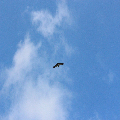

In [ ]:
img = image.load_img('/content/test_data/test_data/himgri/IMG_5387.JPG',target_size=(120,120))
img

In [ ]:
img = image.img_to_array(img)
img

In [ ]:
img = np.expand_dims(img,axis=0)
np.argmax(model.predict(img))

1/1 [==============================] - 0s 23ms/step


8

In [ ]:
pred=np.argmax(model.predict(img))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul', 'himgri', 'hsparo','indvul', 'jglowl', 'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 24ms/step
himgri


In [ ]:
img = image.load_img('/content/test_data/test_data/himgri/IMG_5386.JPG',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
np.argmax(model.predict(img))
pred=np.argmax(model.predict(img))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul', 'himgri', 'hsparo','indvul', 'jglowl', 'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
himgri


In [ ]:
#Testing 3

img = image.load_img('/content/test_data/test_data/cbrtsh/_D32_10313.jpg',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
np.argmax(model.predict(img))
pred=np.argmax(model.predict(img))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul', 'himgri', 'hsparo','indvul', 'jglowl', 'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
cbrtsh
